# Metro Interstate Traffic Volume



Dataset was found through a websit UC Irvine machine learning repository & it is about Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume from 2012-2018.

***Share the link to the dataset in the above line. Also dont just copy paste the lines from the dataset link. Please write description of the dataset on your own.***

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [ ]:
df=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

Let us look at the summary of the data.

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918


In [ ]:
#From the below calculation we can filter data based on time series
#1. Creating a copy of data set by day of week,month & year.
#2. Also creating a new data frame for day & night to analyse data according day & night time frame between 7 AM till 7PM & 7PM till 7AM respectively.

df['date_time']=pd.to_datetime(df['date_time'])
df_copy=df.copy()
df_copy['Day of the Week']=df_copy['date_time'].dt.dayofweek
day=df_copy.copy()[(df_copy['date_time'].dt.hour>=7) & (df_copy['date_time'].dt.hour <19)]
df_copy['Month']=df_copy['date_time'].dt.month
df_copy['Year']=df_copy['date_time'].dt.year
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day of the Week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545,4
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516,4
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,4767,4
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,5026,4
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,4918,4


In [ ]:
night=df_copy.copy()[(df_copy['date_time'].dt.hour>=19) | (df_copy['date_time'].dt.hour <7)]
print(night.shape)

(24327, 12)


In [ ]:
df_copy.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day of the Week,Month,Year
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355,3.001141,6.537715,2015.512426
std,13.338232,44.789133,0.008168,39.015750,1986.860670,1.998085,3.413871,1.893211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000,1.000000,4.000000,2014.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000,3.000000,7.000000,2016.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000,5.000000,9.000000,2017.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,6.000000,12.000000,2018.000000


In [ ]:
df_copy.shape

(48204, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


The shape of the data has 9 features & 48204 rows, gives information on hourly weather features and holidays included for impacts on traffic volume from 2012-2018.

# Data Cleaning

Finding null values in data set

In [ ]:
df_copy.isnull().sum()


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
Day of the Week        0
Month                  0
Year                   0
dtype: int64

There are no null values in data set

***How do you end a sentence?***

Descriptive statistics for quantitative features of the dataset can be generated using describe() method as shown below.

***Why is the above line here?***

There are 3 categorical features & 6 numerical features in data set.

In [ ]:
df_copy.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'Day of the Week',
       'Month', 'Year'],
      dtype='object')

Lets take a look at the correlation between different attribues of the data set.

<ipython-input-11-8ea92dfc3014>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix= df_copy.corr()


<Axes: >

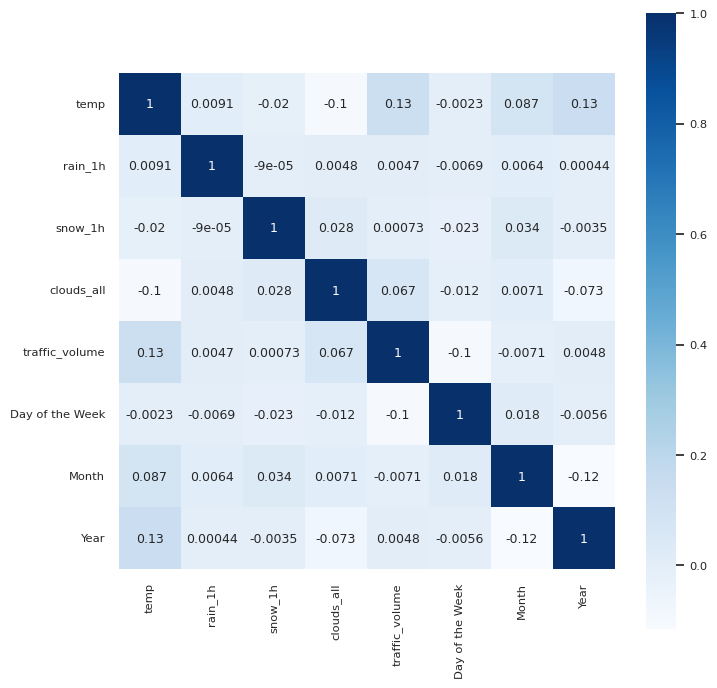

In [ ]:
correlationMatrix= df_copy.corr()
plt.figure(figsize=(8,8))
sns.set(font_scale = 0.75)
sns.heatmap(correlationMatrix, square = True, annot = True, cmap='Blues')

As per the above heatmap we can notice that there is no correlation between the different attributes of the dataset.

# Univariate Analysis


# Target feature :*Traffic_volume*

Text(0.5, 1.0, 'Distribution of Traffic Volume')

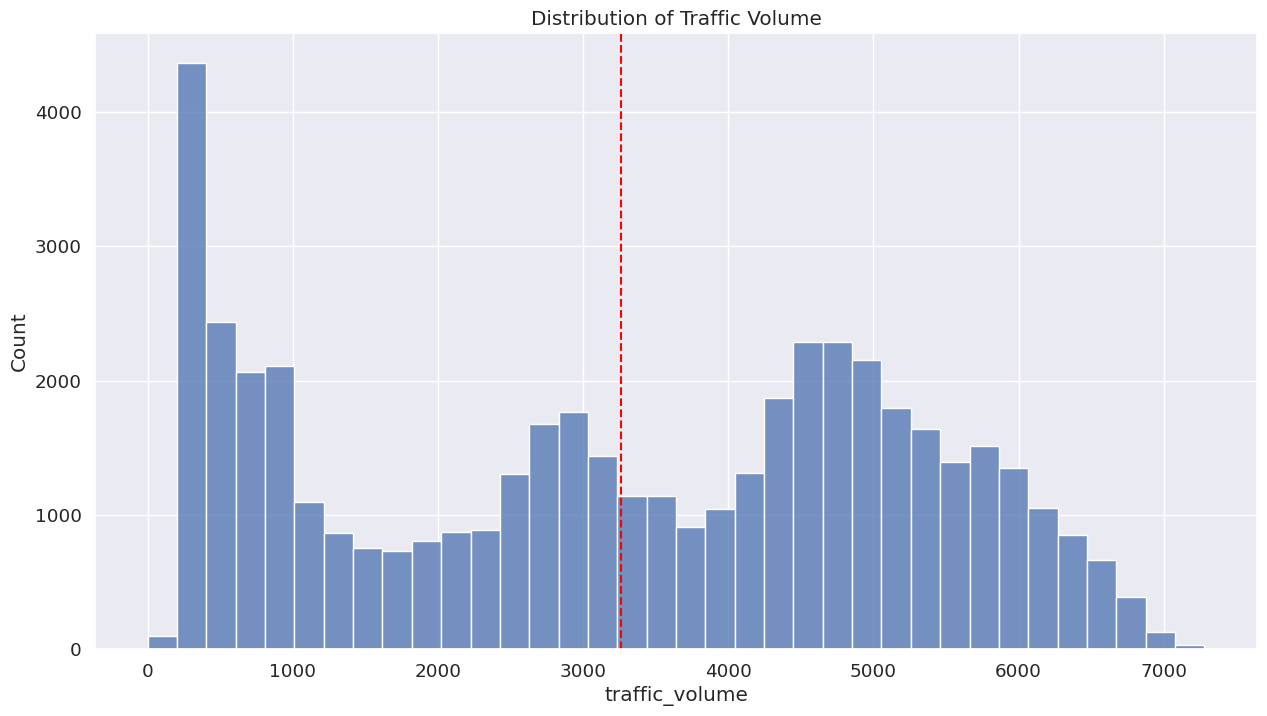

In [ ]:
sns.set(font_scale=1.2, style="darkgrid")

plt.figure(figsize=(15,8))

sns.histplot(df['traffic_volume'])
plt.axvline(df['traffic_volume'].mean(),ls = "--", color = "red")
plt.title("Distribution of Traffic Volume")

Mean value is 3259 Hourly I-94 ATR 301 reported westbound traffic volume.
The *traffic_volume* ranges between 1193 to 4933/hourly.


***I dont understand the second sentence above?***

In [ ]:
# Analizing day time vs night time
df['date_time'] = pd.to_datetime(df['date_time'])

#Extracting month into a new column
df['month'] = df['date_time'].dt.month
df['month'] = df['month']


In [ ]:
#Creating a new column with corresponding average daylight hours (Aprox)
daylight_start = {1: '07:47:00' , 2: '07:14:00', 3: '07:24:00', 4: '06:27:00', 5: '05:44:00', 6: '05:25:00', 7: '05:40:00',
                  8: '06:15:00', 9: '06:50:00', 10: '07:27:00', 11: '07:11:00', 12: '07:43:00'}
daylight_end = {1: '16:58:00' , 2: '17:40:00', 3: '19:19:00', 4: '19:58:00', 5: '20:34:00', 6: '21:01:00', 7: '20:57:00',
                8: '20:18:00', 9: '19:25:00', 10: '18:29:00', 11: '16:43:00', 12: '16:31:00'}


df['day_start'] = df['month'].map(daylight_start)
df['day_end'] =df['month'].map(daylight_end)
df['day_start'] = pd.to_datetime(df['day_start']).dt.time
df['day_end'] = pd.to_datetime(df['day_end']).dt.time
df['hour']=pd.to_datetime(df['date_time']).dt.hour


In [ ]:
#Assigning day and night time categories
day_filter = ((df['date_time'].dt.time >= df['day_start']) & (df['date_time'].dt.time <=df['day_end']))
df['day_OR_night'] = ''
df.loc[day_filter, ['day_OR_night']] = True
df.loc[~day_filter, ['day_OR_night']] = False

In [ ]:
#Creating boolean indexings for day and night
daydf = df['day_OR_night'] == True
nightdf = df['day_OR_night'] == False

# #Plotting day and night histograms
# plt.figure(figsize=(12,5))

# plt.subplot(1, 2, 1)
# plt.hist(df.loc[daydf, ['traffic_volume']])
# plt.title('Traffic Volume: Day')
# plt.ylabel('Frequency')
# plt.xlabel('Traffic Volume')

# plt.subplot(1, 2, 2)
# plt.hist(df.loc[nightdf, ['traffic_volume']])
# plt.title('Traffic Volume: Night')
# plt.ylabel('Frequency')
# plt.xlabel('Traffic Volume')

# plt.show()

Traffic is more in the day time when compared to night traffic.

***Wheres the full stop?***

<ipython-input-17-1666a8011e54>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourdf=df.groupby('hour').mean()


<Axes: xlabel='hour'>

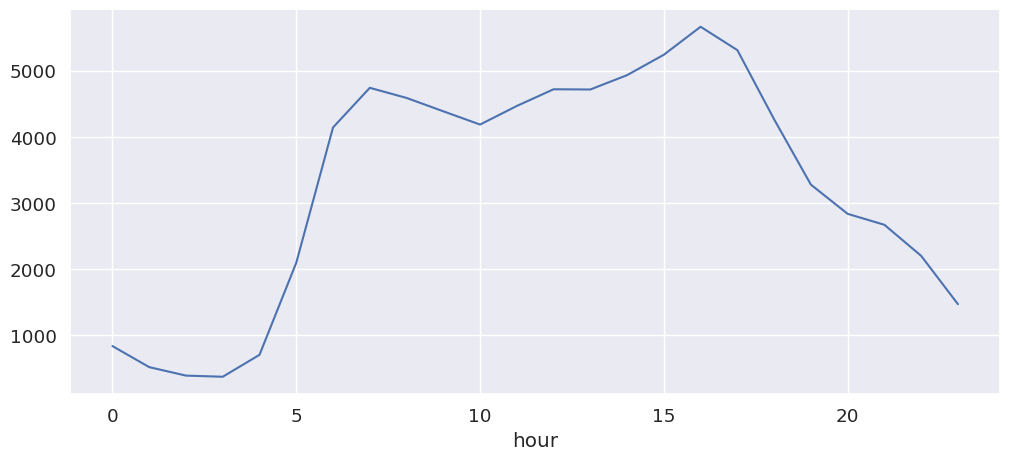

In [ ]:
hourdf=df.groupby('hour').mean()
plt.figure(figsize=(12,5))
hourdf['traffic_volume'].plot.line()


<ipython-input-18-8152adab9151>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yeardf=df_copy.groupby('Year').mean()


<Axes: xlabel='Year'>

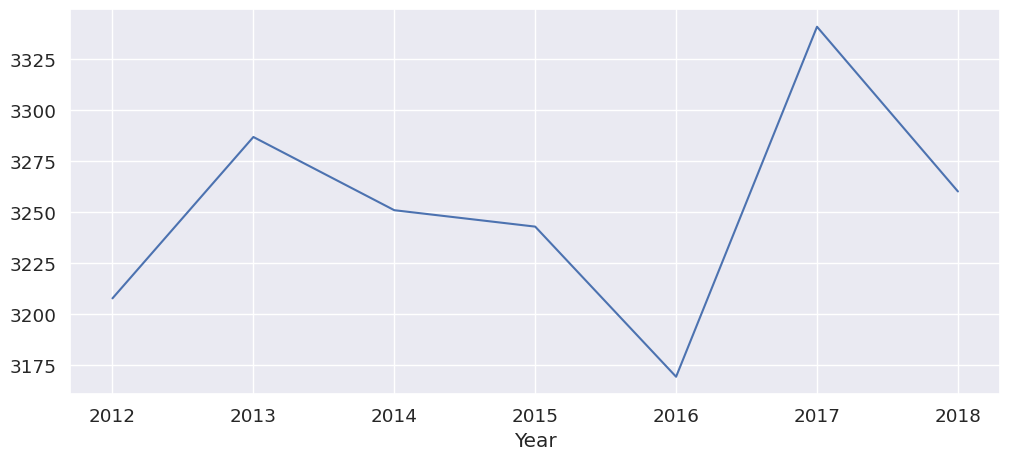

In [ ]:
yeardf=df_copy.groupby('Year').mean()
plt.figure(figsize=(12,5))
yeardf['traffic_volume'].plot.line()

<ipython-input-19-7a64360a7f9d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthdf=df_copy.groupby('Month').mean()


<Axes: xlabel='Month'>

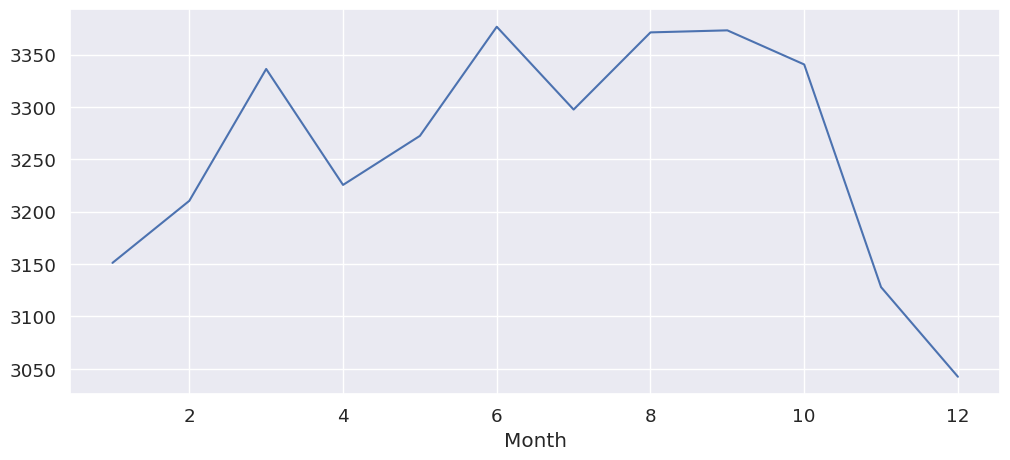

In [ ]:
monthdf=df_copy.groupby('Month').mean()
plt.figure(figsize=(12,5))
monthdf['traffic_volume'].plot.line()

<ipython-input-20-fd634affe15d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_weekdf=df_copy.groupby('Day of the Week').mean()


<Axes: xlabel='Day of the Week'>

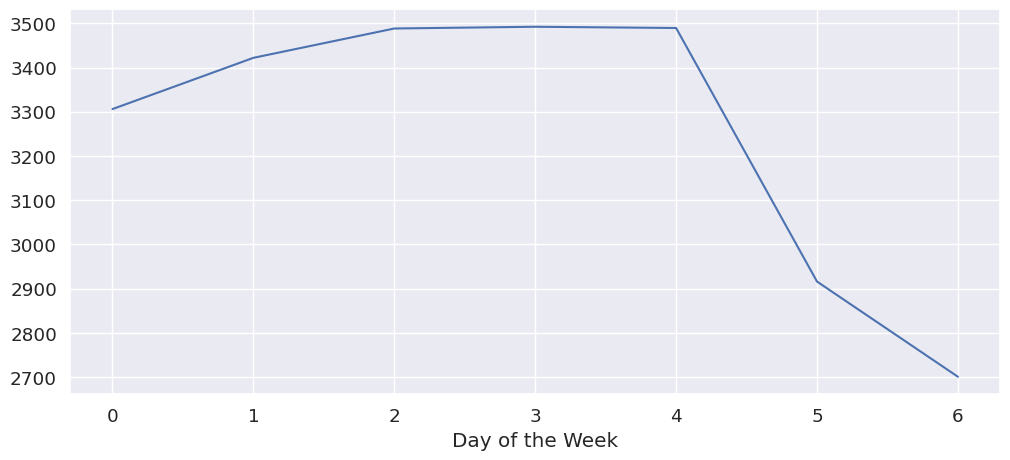

In [ ]:
day_of_weekdf=df_copy.groupby('Day of the Week').mean()
plt.figure(figsize=(12,5))
day_of_weekdf['traffic_volume'].plot.line()

# Bivariate Analysis



## Categorical Feature- *Weather_Main*

***Maybe first take a look at weather conditions affecting traffic flow for the whole day and then do day and night comparision?***

Below visualisation give us an overview of mean *traffic_volume* during Day/Night with different *weather_main*

<Axes: xlabel='weather_main', ylabel='traffic_volume'>

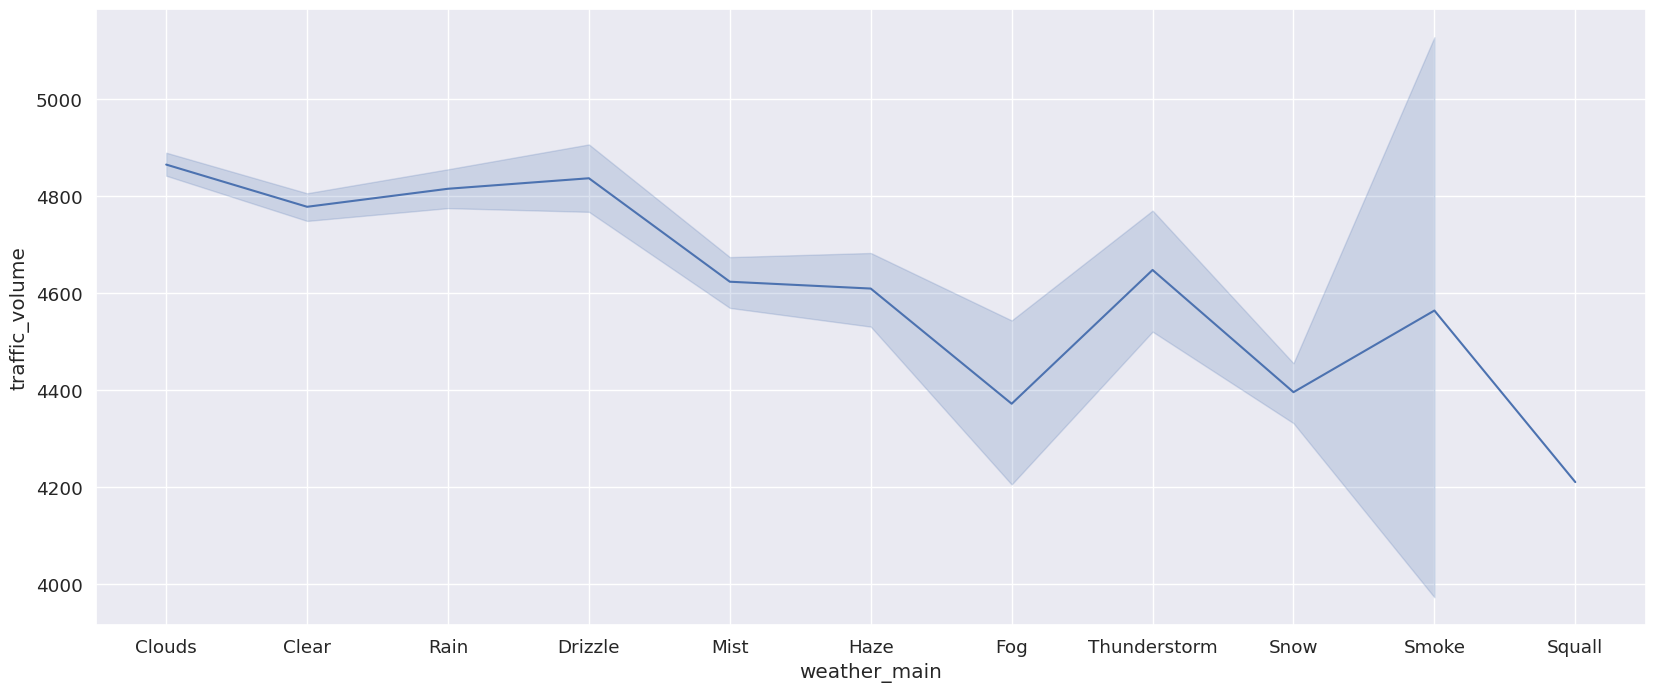

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=day,x='weather_main',y='traffic_volume')

<Axes: xlabel='weather_main', ylabel='traffic_volume'>

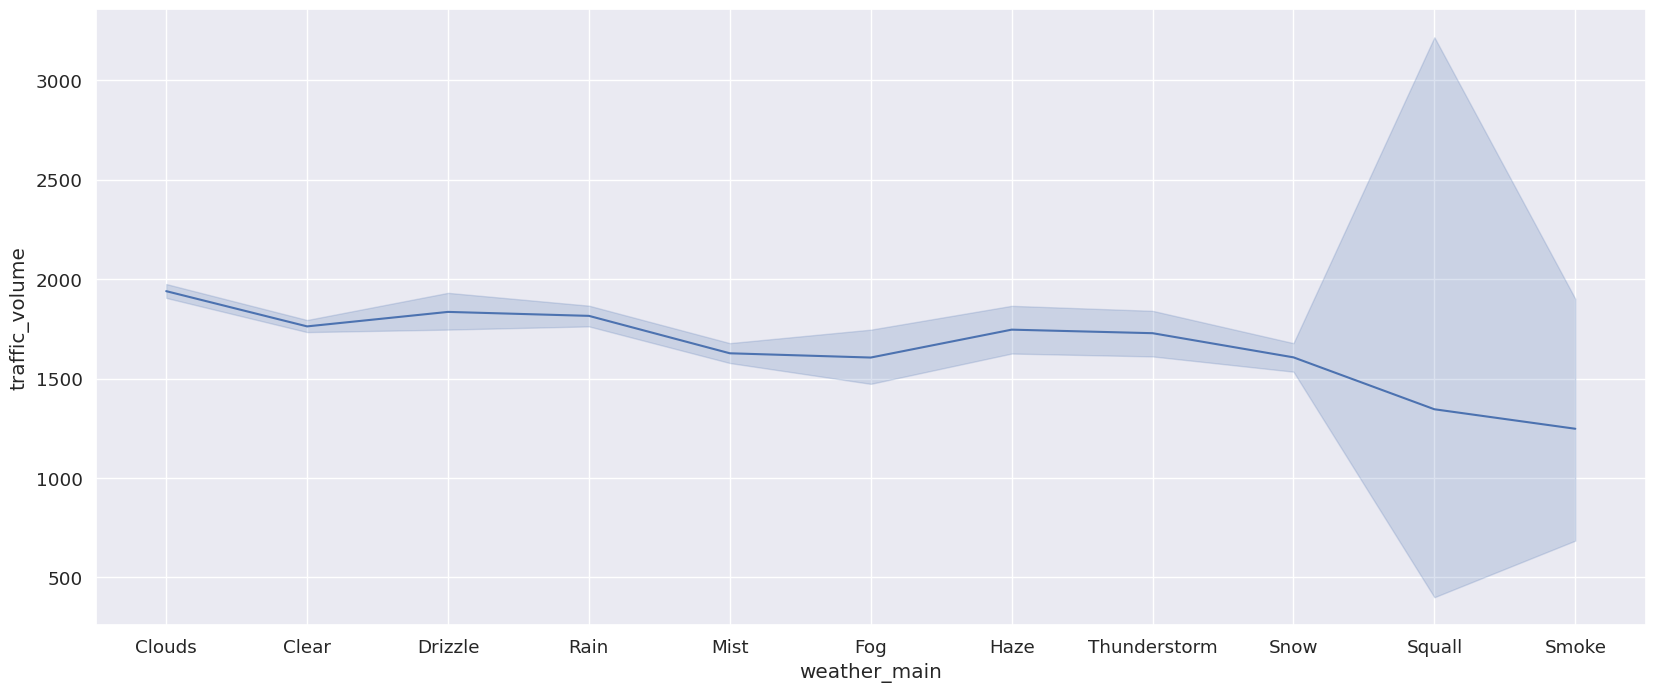

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=night,x='weather_main',y='traffic_volume')

***P.S. Remove CI from the above line plots***

From the above plot we can notice that due to Fog,thunderstorm, snow & smoke weather conditions contributes to high traffic volume during day ,and doesnt have much effect during night since the traffic volume is less .

## Numerical Feature- Rain_1h

<Axes: xlabel='traffic_volume', ylabel='rain_1h'>

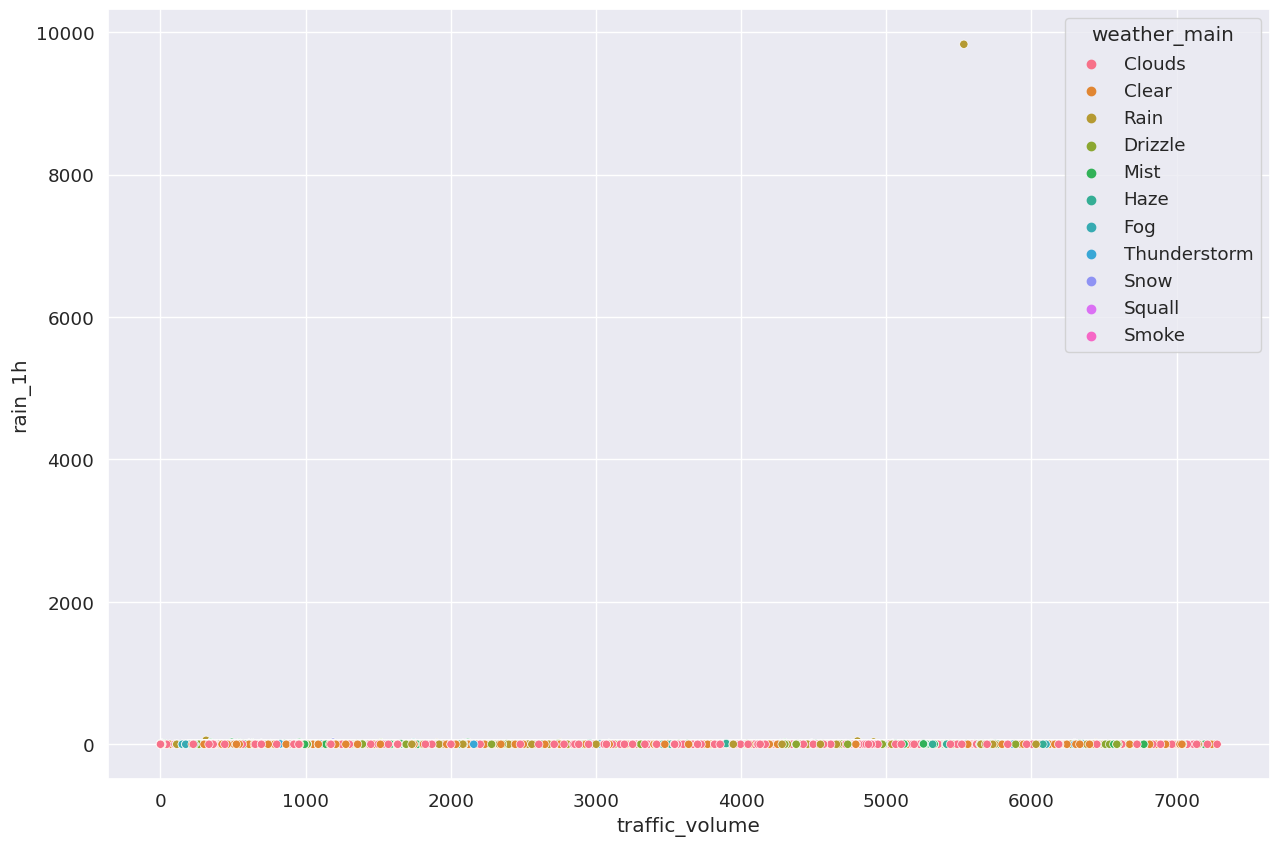

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_copy,x='traffic_volume',y='rain_1h',hue='weather_main')

Mean *rain_1h* is less than 1 i,e 0.33 hence the above plot shows more traffic volume towards 0 & high *traffic_volume* more than 4500.

<Axes: xlabel='temp', ylabel='snow_1h'>

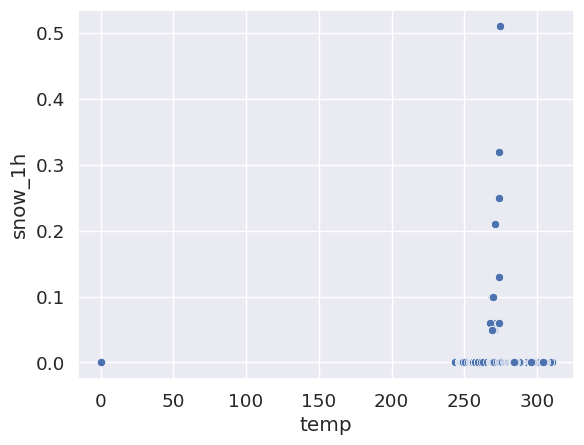

In [ ]:
sns.scatterplot(data=day,x='temp',y='snow_1h')

With the below visualisation we can notice that when the temperature is more than 250 degree kelvin there is high chances of snow & its average is about 0.0002 snow_1h.

### Rain days

<ipython-input-25-f7503ef3d393>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raindf=df_copy.groupby('rain_1h').mean()


<Axes: xlabel='Year', ylabel='traffic_volume'>

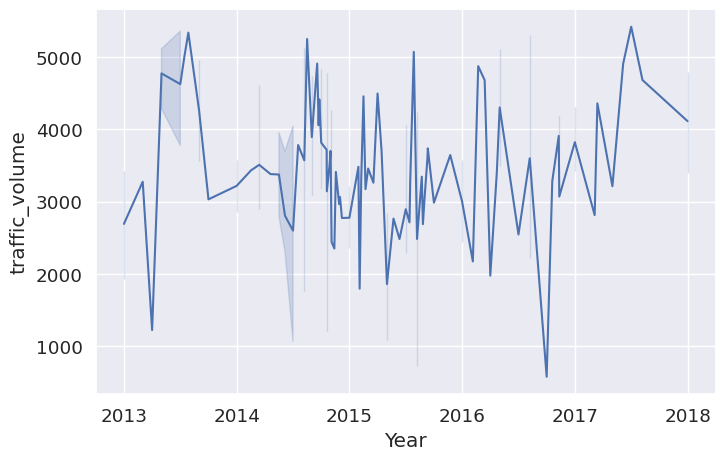

In [ ]:
raindf=df_copy.groupby('rain_1h').mean()
plt.figure(figsize=(8,5))
sns.lineplot(data=raindf, x="Year", y="traffic_volume")

In [ ]:
print(raindf)

               temp   snow_1h  clouds_all  traffic_volume  Day of the Week  \
rain_1h                                                                      
0.00     280.711026  0.000194   47.802915     3257.336321         3.010595   
0.25     285.971994  0.000000   60.034810     3261.965190         2.757384   
0.26     284.600000  0.000000   82.500000     5945.500000         2.000000   
0.27     285.156000  0.000000   80.000000     5130.000000         3.200000   
0.28     289.946522  0.000000   69.000000     3736.782609         2.956522   
...             ...       ...         ...             ...              ...   
28.70    264.500000  0.000000   64.000000     1190.000000         3.000000   
31.75    297.710000  0.000000    0.000000     4913.000000         1.000000   
44.45    295.820000  0.000000   76.000000     4802.000000         0.000000   
55.63    289.100000  0.000000   68.000000      315.000000         0.000000   
9831.30  302.110000  0.000000   75.000000     5535.000000       

<Axes: xlabel='Month', ylabel='traffic_volume'>

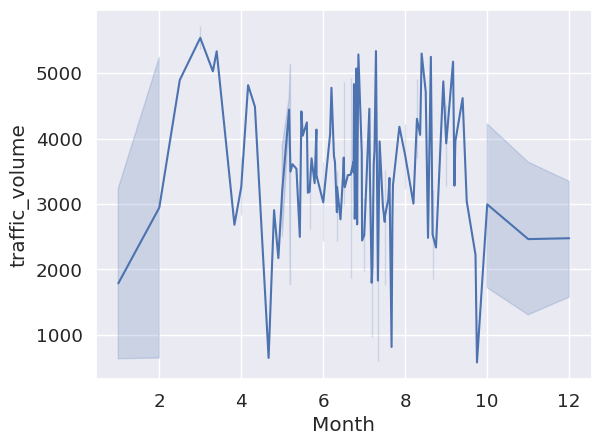

In [ ]:
sns.lineplot(data=raindf, x="Month", y="traffic_volume")

<Axes: xlabel='Day of the Week', ylabel='traffic_volume'>

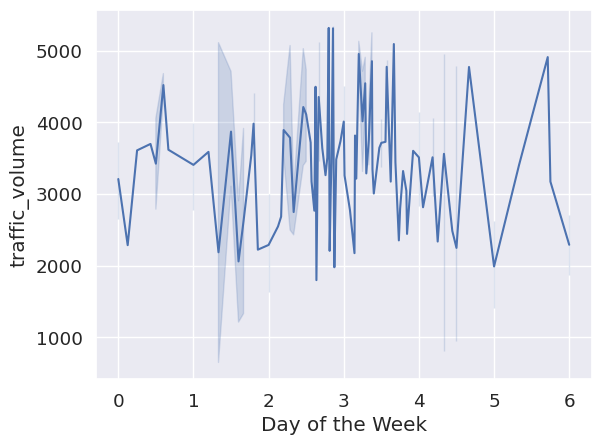

In [ ]:
sns.lineplot(data=raindf, x="Day of the Week", y="traffic_volume")

<Axes: xlabel='traffic_volume', ylabel='rain_1h'>

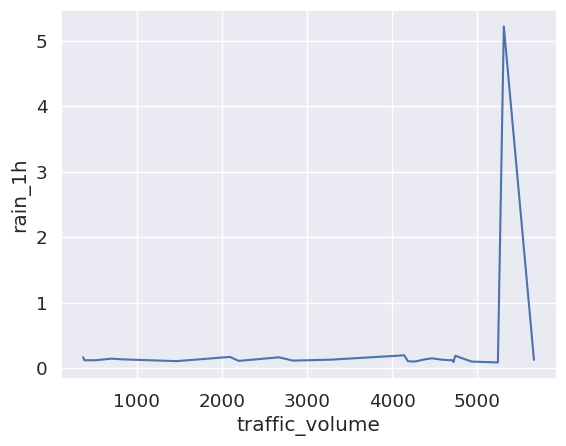

In [ ]:
sns.lineplot(data=hourdf, x="traffic_volume", y="rain_1h")

### Snow fall



In [ ]:
snowdays=df_copy[['snow_1h','Day of the Week','Month', 'Year','traffic_volume']]
snowdays.head()

,snow_1h,Day of the Week,Month,Year,traffic_volume
0,0.0,4,2,2012,5545
1,0.0,4,2,2012,4516
2,0.0,4,2,2012,4767
3,0.0,4,2,2012,5026
4,0.0,4,2,2012,4918


In [ ]:
snowdf=snowdays.groupby('snow_1h').mean()
print(snowdf)

         Day of the Week      Month         Year  traffic_volume
snow_1h                                                         
0.00            3.003157   6.532727  2015.512619     3260.238508
0.05            1.285714  12.000000  2015.000000     2410.928571
0.06            2.083333   9.000000  2015.666667     3078.250000
0.08            0.000000   8.000000  2016.000000      401.000000
0.10            2.000000  10.333333  2015.333333     2415.666667
0.13            1.666667   9.000000  2015.666667     4163.666667
0.17            0.000000   8.000000  2016.000000      359.000000
0.21            5.000000  12.000000  2015.000000     2013.000000
0.25            0.666667   8.666667  2015.666667     3053.000000
0.32            2.000000  12.000000  2015.000000     5198.000000
0.44            0.000000  12.000000  2015.000000     2165.000000
0.51            1.333333  12.000000  2015.000000     3740.666667


<Axes: xlabel='Year', ylabel='traffic_volume'>

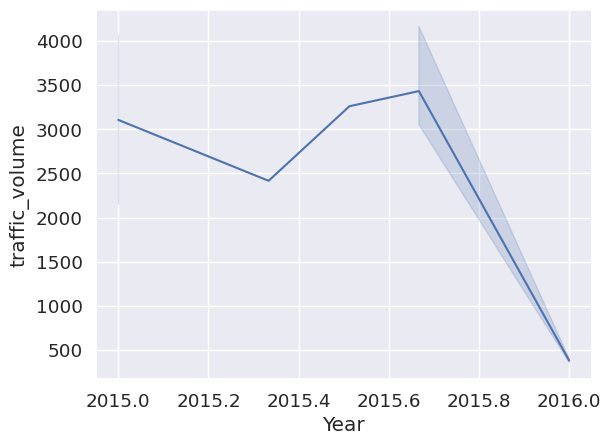

In [ ]:
sns.lineplot(data=snowdf,x='Year',y='traffic_volume')

<Axes: xlabel='Month', ylabel='traffic_volume'>

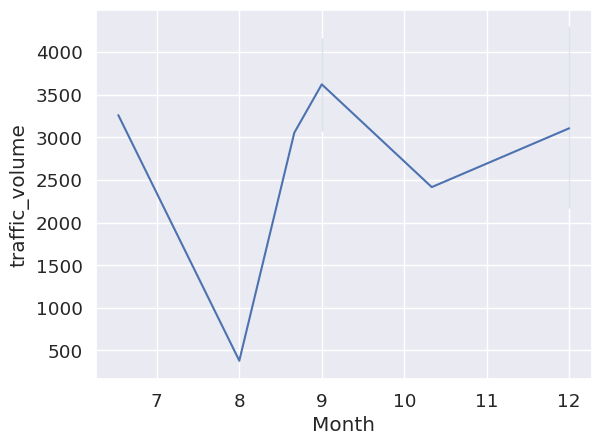

In [ ]:
sns.lineplot(data=snowdf,x='Month',y='traffic_volume')

<Axes: xlabel='Day of the Week', ylabel='traffic_volume'>

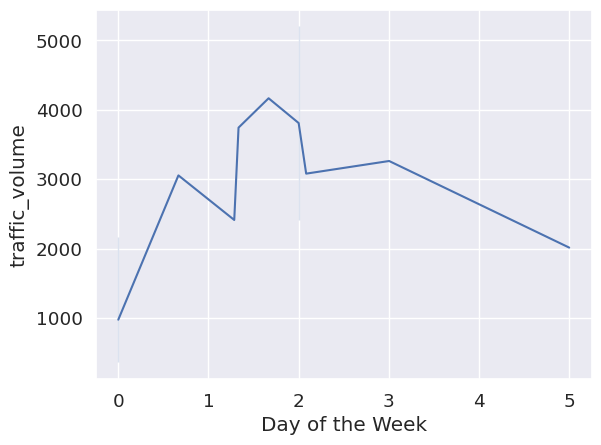

In [ ]:
sns.lineplot(data=snowdf,x='Day of the Week',y='traffic_volume')

Now, looking at the snow patterns in the given data set ,by considering day of the week, month & year, below are the points noticed:

1.Snowfall seems to be more during sunday, monday, tuesday & wednesday in a week.

2.Snowfall is more during November & December time of the year, which seems to be obvious as its the winter season .

3.Between 2014 & 2016 there is highest snowfall in this region as per the record.

##Conclusion

In this project, we aimed to find a few indicators of heavy traffic on the I-94 Interstate highway. We conclude that datetime indicators are more relevant than weather conditions indicator. Some of the indicators for heavy traffic found in this dataset are:

1.  Traffic is more in the day time when compared to night traffic
2.  we can notice that due to Fog,thunderstorm, snow & smoke weather conditions contributes to high traffic volume during day.
3. Data doesnt show any attributes correalted to *traffic_volume*.


